In [13]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

## Solving Linear Equations

### Contents
- Linear Equations
- Numpy
- Numpy.linalg
- Least Square Method

Given the following linear equations:

\begin{equation}
a_{11}x_{1}+a_{12}x_{2}+a_{13}x_{3}+\cdot\cdot\cdot=b_{1}
\end{equation}

\begin{equation}
a_{21}x_{1}+a_{21}x_{2}+a_{23}x_{3}+\cdot\cdot\cdot=b_{2}
\end{equation}

These equations can be set on the following general form:

\begin{equation}
Ax=b
\end{equation}

Where A is a matrix, x is a vector with the unknowns and b is a vector of constants

\begin{equation}
x=\begin{bmatrix}x_{1}\\ x_{2}\\ \vdots\\ x_{n}\end{bmatrix} \qquad b=\begin{bmatrix}b_{1}\\ b_{2}\\ \vdots\\ b_{n}\end{bmatrix}
\end{equation}

\begin{equation}
x=A^{-1}b
\end{equation}

\begin{equation}
A=\begin{bmatrix}a_{11}&\cdot\cdot\cdot&a_{1m}\\ \vdots&\vdots&\vdots\\ a_{n1}&\cdot\cdot\cdot&a_{nm}\end{bmatrix}
\end{equation}

(assuming $A^{-1}$ is possible)


Example:

\begin{align*}
x_1 + 2x_2 &= 5 \\
3x_1 + 4x_2 &= 6
\end{align*}


In [14]:
# Example 1

A = np.array([[1,2], [3,4]])
B = np.array([[5], [6]])

X = la.solve(A,B)
print(X)


[[-4. ]
 [ 4.5]]


Non Quadratic equation:

\begin{align*}
x_1 + 2x_2 &= 5 \\
3x_1 + 4x_2 &= 6 \\
7x_1 + 8x_2 &= 9
\end{align*}

In [15]:
# Example 2

# Define the matrix A, representing coefficients of the linear equations.
A = np.array([[1,2],[3,4], [7,8]])

# Define the matrix B, representing the constants on the right-hand side of the equations.
B = np.array([[5], [6], [9]])

# Use the least squares method to find an approximate solution for X in AX = B.
# This is necessary because the system of equations is overdetermined (more equations than unknowns).
X = la.lstsq(A,B, rcond = None)[0] # To get only the first solution

# Print the solution. Execute this code yourself to see the output.
print(X)

[[-3.5       ]
 [ 4.17857143]]


### Least Square Method

Given:

\begin{equation}
Ax=b
\end{equation}

The Least Square Method is given by:

$$x_{LS} = (A^TA)^{-1}A^Tb$$

The Least Square Method works for Non-Quadratic matrices as well.


In [16]:
# Doing the least square method without the function from scratch.

X = la.inv(A.transpose()*np.mat(A))*A.transpose()*B
print(X)

[[-3.5       ]
 [ 4.17857143]]


Example: 3 equations and 3 unknowns

\begin{align*}
4x + 3y + 2z &= 25 \\
-2x + 2y + 3z &= -10 \\
3x - 5y +2z &= -4
\end{align*}

In [17]:
# Exmaple 3 : Comparinf all the three different methods.

A = np.array([[4,3,2], [-2,2,3], [3,-5,2]])
B = np.array([[25], [-10], [-4]])
# First solution using la.solve method
X_1 = la.solve(A,B)
print("First sol: ", X_1)
# Second solution using Least squared method
X_2 = la.lstsq(A,B, rcond = None)[0]
print("Second sol: ", X_2)
# Third Solution using LSM from scratch
X_3 = la.inv(A.transpose()*np.mat(A))*A.transpose()*B
print("Third sol: ", X_3)

First sol:  [[ 5.]
 [ 3.]
 [-2.]]
Second sol:  [[ 5.]
 [ 3.]
 [-2.]]
Third sol:  [[ 5.]
 [ 3.]
 [-2.]]


## Interpolation in Python

- Interpolation is used to estimate data points between two known points.
- The most common interpolation technique is **Linear Interpolation**.
-  others are **Quadratic**, **Cubic**, ... (splines).

Q: Assume the following data:

| X | Y |
|---|---|
| 1 | 3|
| 2| 2|
| 3 | 0|

Assume we want to find the value for y at x=2.5.

New Interpolated value: 1.0


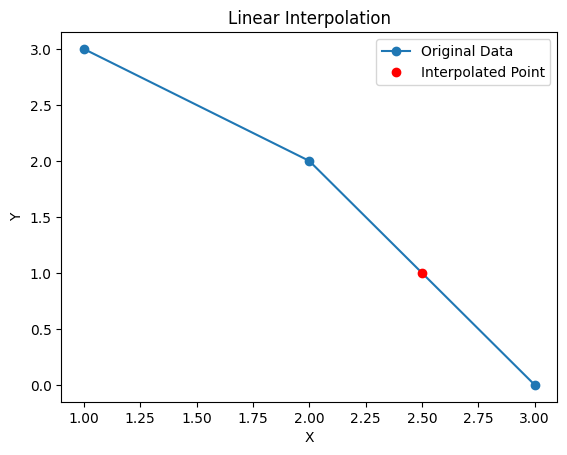

In [18]:
# Define the x and y coordinates of the known data points
x = np.array([1, 2, 3])
y = np.array([3, 2, 0])

# Define the x-coordinate for which we want to interpolate the y-value
x_new = 2.5

# Perform linear interpolation to find the y-value at x_new
y_new = np.interp(x_new, x, y)
print("New Interpolated value:", y_new)

# Plot the original data points and the interpolated point
plt.plot(x, y, 'o-', label='Original Data')  # Plot original data with a label
plt.plot(x_new, y_new, 'ro', label='Interpolated Point')  # Plot interpolated point in red with a label

# Add labels and a legend to the plot for clarity
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Interpolation')
plt.legend()

# Display the plot
plt.show()

Scipy Example

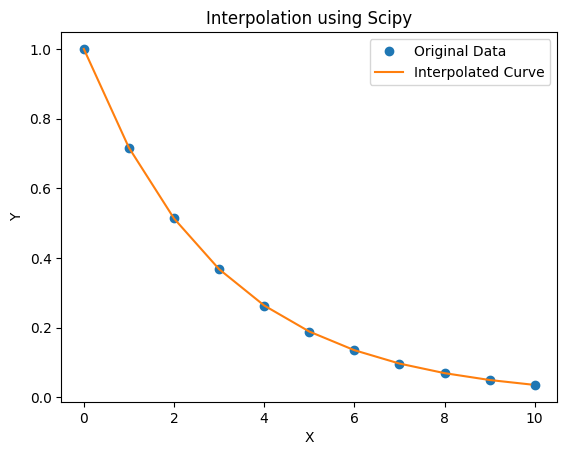

In [19]:
# Import the scipy library and the interpolate module
import scipy
from scipy import interpolate

# Create an array of x-values from 0 to 10
x = np.arange(0, 11)
# Calculate corresponding y-values using an exponential function
y = np.exp(-x / 3.0)

# Create a linear interpolation function based on x and y
f = interpolate.interp1d(x, y)

# Define the start, stop and step values for a new x-range
x_start = 0
x_stop = 10
x_step = 0.1

# Create a new array of x-values using the defined range and step
x_new = np.arange(x_start, x_stop, x_step)

# Interpolate y-values for the new x-values using the interpolation function
y_new = f(x_new)

# Plot the original data points and the interpolated curve
plt.plot(x, y, 'o', label='Original Data')  # Plot original data with circles and a label
plt.plot(x_new, y_new, '-', label='Interpolated Curve')  # Plot interpolated curve as a line with a label

# Add labels and a legend to the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interpolation using Scipy')
plt.legend()

# Display the plot
plt.show()

Linear Vs. Cube Interpolation

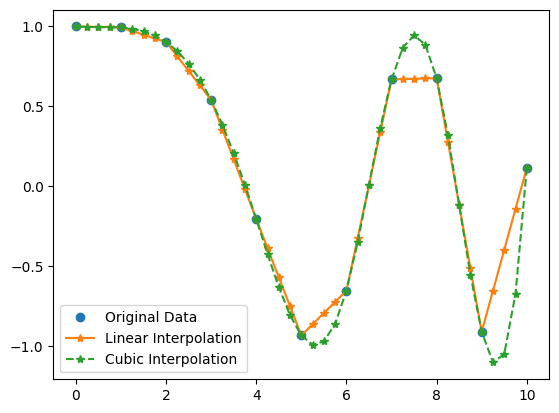

In [20]:
# Import the necessary library for interpolation
from scipy import interpolate

# Create an array of x-values from 0 to 10 with 11 evenly spaced points
x = np.linspace(0, 10, num=11, endpoint=True)

# Calculate corresponding y-values using a cosine function
y = np.cos(-x**2 / 9.0)

# Create a linear interpolation function based on x and y
f = interpolate.interp1d(x, y)

# Create a cubic interpolation function based on x and y
f2 = interpolate.interp1d(x, y, kind='cubic')

# Create a new array of x-values for interpolation with finer spacing (41 points)
xnew = np.linspace(0, 10, num=41, endpoint=True)

# Plot the original data points, linear interpolation, and cubic interpolation
plt.plot(x, y, 'o', label='Original Data')  # Plot original data with circles
plt.plot(xnew, f(xnew), '-*', label='Linear Interpolation')  # Plot linear interpolation with a line and star markers
plt.plot(xnew, f2(xnew), '--*', label='Cubic Interpolation')  # Plot cubic interpolation with a dashed line and star markers

# Add a legend to the plot to distinguish the different lines
plt.legend(loc='best')

# Display the plot
plt.show()

The graph demonstrates how linear and cubic interpolation techniques can be used to estimate values between known data points. While linear interpolation is simpler, cubic interpolation generally offers a more accurate and visually pleasing representation of the underlying trend, especially when dealing with non-linear data.

## Curve Fitting

- In the previous section we found interpolated points i.e., we found values between the measured points using the **interpolation** techniques.
- It would be more convenient to model the data as mathematical function y = f(x).
Then we could easily calculate any data we want based on this model.

____________________________________________________________________

- Python has curve fitting functions that allows us to create empirical data model.
- It is important to have in mind that these models are good only in the region we have collected the data.
- Here are some of the functions available in Python for curve fitting
    - polyfit()
    - polyval()
    - curve_fit()
- Some of these techniques use a polynomial of degree N that fits the data Y best in a lease square sense.


#### Polynomials

A polynomial is expressed as:
$$p(x) = p_1 x^n + p_2 x^{n-1} + ... + p_n x + p_{n+1}$$

where p1, p2 and p3, .... are the coefficients of the polynomial.

We have **Linear Regression** and **Polynomial Regression**.

Given the following polynomial:
$$p(x) = -5.45 x^4 + 3.2 x^2 + 8x +5.6 $$

We need to rewrite in Python like
$$p(x) = 5.6 + 8x + 3.2 x^2 + 0x^3 - 5.45 x^4 $$

In [21]:
# Example 1
import numpy.polynomial.polynomial as poly
p = [5.6, 8, 3.2, 0, -5.45]

r = poly.polyroots(p)
print(r)

[-0.72296075+0.j         -0.36184729-0.92277811j -0.36184729+0.92277811j
  1.44665533+0.j        ]


#### Linear Regression

It is a first order polynomial (n=1).

$$p(x) = p_1x + p_2$$

or:

$$y(x) = ax +b$$


** Example 1 **

Assume the data:

| X | Y |
|---|---|
| 0 | 15|
| 1| 10|
| 2 | 9|
| 3| 7|
| 4 | 5|
| 5| 3|
| 6 | 1|
| 7| 0|



Optimal parameters (a, b): [-2.02380952 13.33333333]


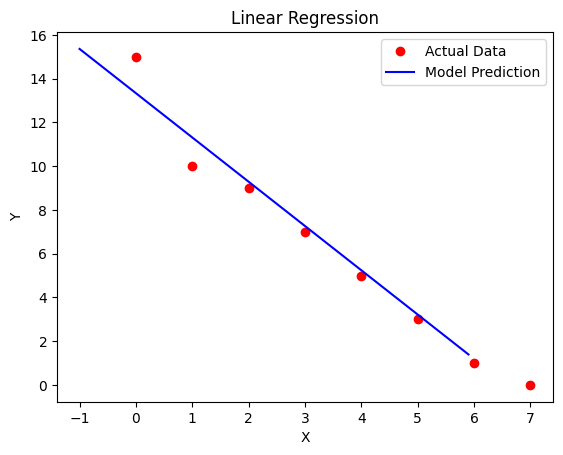

In [22]:
# Import the necessary library for curve fitting
from scipy.optimize import curve_fit

# Define the linear model function
def linear_model(x, a, b):
  """Linear model function y = ax + b."""
  return a * x + b

# Sample data representing x and y values
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([15, 10, 9, 7, 5, 3, 1, 0])

# Fit the linear model to the data using curve_fit
popt, pcov = curve_fit(linear_model, x, y)

# Print the optimal parameters for the linear model (slope and intercept)
print("Optimal parameters (a, b):", popt)

# Generate x-values for the model prediction
x_model = np.arange(-1, 6, 0.1)  # Start from -1, end at 6, step size of 0.1

# Calculate y-values based on the fitted model
y_model = linear_model(x_model, *popt)  # Use the optimal parameters obtained from curve_fit

# Plotting the actual data and the model prediction
plt.plot(x, y, 'or', label='Actual Data')  # Plot actual data with red circles
plt.plot(x_model, y_model, 'b', label='Model Prediction')  # Plot model prediction with a blue line

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In the context of the curve_fit function from scipy.optimize, popt and pcov represent the following:

popt: This is an array containing the optimal values for the parameters of your model. In the case of the linear model a * x + b, popt would contain two values: the optimal slope (a) and the optimal intercept (b) that best fit the provided data.

pcov: This is a 2D array representing the estimated covariance of the optimal parameters in popt. The diagonal elements of pcov provide an estimate of the variance of each parameter. The off-diagonal elements give an idea of the correlation between the estimated parameters.

Essentially, popt tells you the best-fit values for your model's parameters, and pcov gives you information about the uncertainty and relationships between those estimated parameters.

Few more examples:

1. First Order:
$$y(x) = ax + b $$
2. Second Order:
$$y(x) = ax^2 + bx +c $$
3. Third Order:
$$y(x) = ax^3 + bx^2 + cx + d $$
4. Fourth Order:
$$y(x) = ax^4 + bx^3 + cx^2 + dx + e $$
5. Fifth Order:
$$y(x) = ax^5 + bx^4 + cx^3 + dx^2 + ex + f $$

<ipython-input-29-5a8a0b35e9da>:44: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(model, x, y)


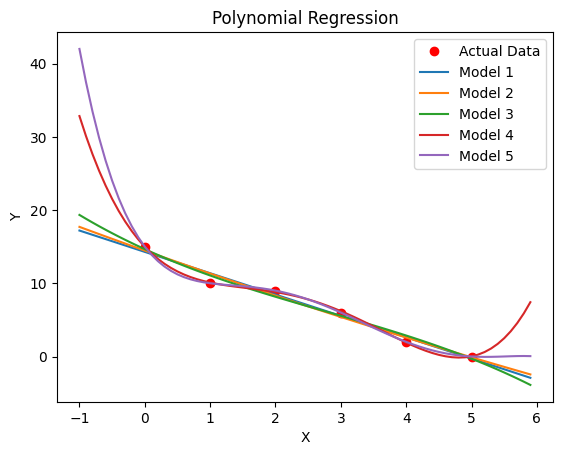

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample data representing x and y values
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([15, 10, 9, 6, 2, 0])

# Define polynomial model functions of different degrees
def model1(x, a, b):
  """Linear model function y = ax + b."""
  return a * x + b

def model2(x, a, b, c):
  """Quadratic model function y = ax^2 + bx + c."""
  return a*x**2 + b*x + c

def model3(x, a, b, c, d):
  """Cubic model function y = ax^3 + bx^2 + cx + d."""
  return a*x**3 + b*x**2 + c*x + d

def model4(x, a, b, c, d, e):
  """Quartic model function y = ax^4 + bx^3 + cx^2 + dx + e."""
  return a*x**4 + b*x**3 + c*x**2 + d*x + e

def model5(x, a, b, c, d, e, f):
  """Quintic model function y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f."""
  return a* x**5 + b* x**4 + c* x**3 + d* x**2 + e *x + f

# List of models to fit
models = [model1, model2, model3, model4, model5]

# Generate x-values for the model prediction
x_start = -1  # Start of x-values for prediction
x_stop = 6   # End of x-values for prediction
x_step = 0.1 # Step size for x-values
x_model = np.arange(x_start, x_stop, x_step)

# Plotting the actual data and the model predictions
plt.plot(x, y, 'or', label='Actual Data')  # Plot actual data with red circles

# Fit and plot each model
for i, model in enumerate(models):
    popt, _ = curve_fit(model, x, y)
    y_model = model(x_model, *popt)
    plt.plot(x_model, y_model, label=f'Model {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

As expected, the higher order models match the data better.

**Note:** The fifth order model matches exaclty because there were only six data points available.

**It is important to have in mind that these models are good only in the region we have collected the data.**

#### Polyfit() and Polyval()

These numpy functions only works for polynomials.

Coefficients for order 1: [-2.02380952 13.33333333]
Coefficients for order 2: [ 0.11904762 -2.85714286 14.16666667]
Coefficients for order 3: [-0.03030303  0.43722944 -3.69047619 14.48484848]
Coefficients for order 4: [ 0.03219697 -0.48106061  2.39204545 -6.33062771 14.87121212]
Coefficients for order 5: [-9.61538462e-03  2.00466200e-01 -1.50670163e+00  4.91608392e+00
 -8.39976690e+00  1.49673660e+01]


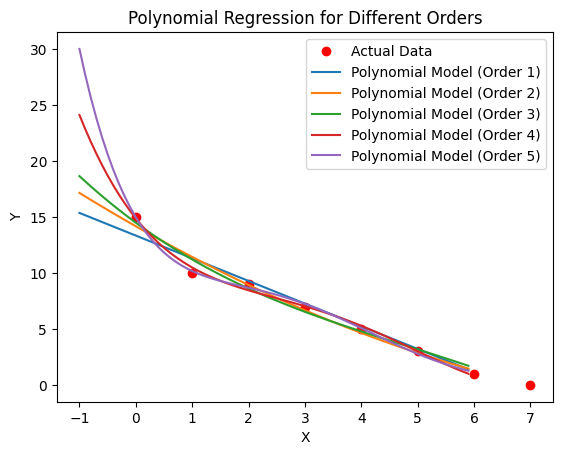

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data representing x and y values
x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [15, 10, 9, 7, 5, 3, 1, 0]

# Define the range of polynomial orders to explore
order_start = 1
order_stop = 5

# Generate x-values for the model prediction (common for all models)
x_start = -1  # Start of x-values for prediction
x_stop = 6   # End of x-values for prediction
x_step = 0.1 # Step size for x-values
x_model = np.arange(x_start, x_stop, x_step)

# Plot the actual data points
plt.plot(x, y, 'or', label='Actual Data')

# Fit and plot polynomial models for each order
for model_order in range(order_start, order_stop + 1):  # Iterate through the desired orders
    p = np.polyfit(x, y, model_order)  # Fit the polynomial model
    print(f"Coefficients for order {model_order}:", p)  # Print coefficients

    y_model = np.polyval(p, x_model)  # Calculate y-values based on the fitted model
    plt.plot(x_model, y_model, label=f'Polynomial Model (Order {model_order})')  # Plot the model prediction

# Add labels and title to the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression for Different Orders')
plt.legend()
plt.show()

Other examples:

Assume we want to fit some given data to the following model:

$$y(x) = a \cdot\sin(x + b)$$


Estimated parameters (a, b): [-1.86155826  0.55076932]


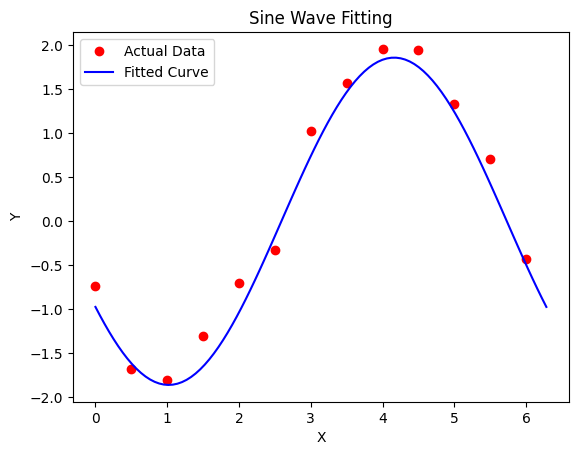

In [41]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the range of x-values for the sine wave
start = 0
stop = 2 * np.pi
increment = 0.5
x = np.arange(start, stop, increment)

# Set the true parameters of the sine wave
a_true = 2
b_true = 10

# Generate noisy y-values based on the sine wave
np.random.seed(0)  # Set a seed for reproducibility
y_noise = 0.2 * np.random.normal(size=len(x))  # Generate random noise
y = a_true * np.sin(x + b_true) + y_noise  # Calculate y-values with noise

# Plot the noisy data
plt.plot(x, y, 'or', label='Actual Data')

# Define the model function for curve fitting
def model(x, a, b):
  """Sine wave model function y = a * sin(x + b)."""
  return a * np.sin(x + b)  # Complete the model function

# Fit the model to the data
popt, pcov = curve_fit(model, x, y)

# Print the estimated parameters
print("Estimated parameters (a, b):", popt)

# Generate x-values for the fitted curve
x_fit = np.linspace(start, stop, 100)  # Use a finer grid for a smoother curve

# Calculate y-values for the fitted curve
y_fit = model(x_fit, *popt)

# Plot the fitted curve
plt.plot(x_fit, y_fit, 'b-', label='Fitted Curve')

# Add labels, title, and legend to the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sine Wave Fitting')
plt.legend()
plt.show()

#### Dynamic System - Application

We have a set of data points which we logged from a "real system".

We want to fit the data to the following model:

$$y(t) = KU(1-e^{-\frac{t}{T}})$$

Where K and T are Model Parameters we need to find

The model above is actually the solution for the differential equation given below:

$$ \frac{dy}{dt} = \frac{-x + k U}{T} $$

We apply a step (u=U=1) in the input signla and log the output signal.


Estimated K: 3.0534722577133038
Estimated T: 5.30405382099393


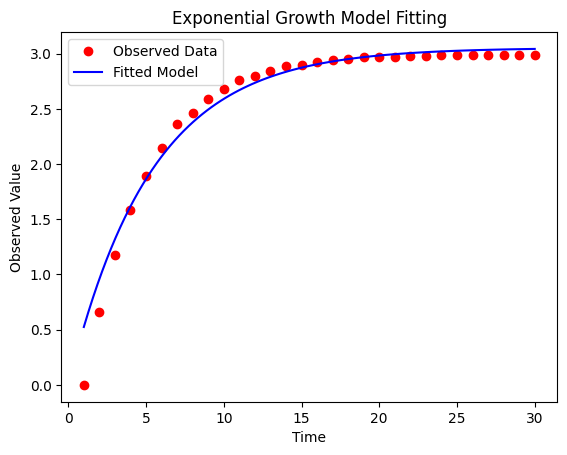

In [48]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Time values (days, for example)
t = np.arange(1, 31, 1)

# Observed data (e.g., growth of something)
y = [0, 0.66, 1.18, 1.58, 1.89, 2.15, 2.36, 2.46, 2.59, 2.68, 2.76, 2.8, 2.84, 2.89, 2.9, 2.92, 2.94, 2.95, 2.96667301, 2.97, 2.97, 2.98, 2.98,
     2.99, 2.99, 2.99, 2.99, 2.99, 2.99, 2.99]

# Define the model function (exponential growth model)
def model(t, K, T):
  """Exponential growth model: y = K * (1 - exp(-t/T))"""
  return K * (1 - np.exp(-t / T))

# Fit the model to the data
popt, pcov = curve_fit(model, t, y)

# Extract the estimated parameters
K_est = popt[0]
T_est = popt[1]
print("Estimated K:", K_est)
print("Estimated T:", T_est)

# Generate a smooth curve for the fitted model
t_fit = np.linspace(1, 30, 100)  # Finer grid for a smoother curve
y_fit = model(t_fit, K_est, T_est)

# Plot the original data and the fitted model
plt.plot(t, y, 'or', label='Observed Data')
plt.plot(t_fit, y_fit, 'b-', label='Fitted Model')

plt.xlabel('Time')
plt.ylabel('Observed Value')
plt.title('Exponential Growth Model Fitting')
plt.legend()
plt.show()

#### Least Square Method

Teh least square method requires the model to be set up in the following form based on input-output data:

$$ Y = Φ \cdotΘ $$

The least squares method is given by:

$$ \theta_{LS} = (\Phi^T \Phi)^{-1} \Phi^T y $$

 The equation represents the normal equation for linear least squares estimation, used to find the optimal parameters θ that minimize the error between the predicted values and the observed data.

LSM Example:

Given the following data:

| X | Y |
|---|---|
| 0 | 15|
| 1| 10|
| 2 | 9|
| 3 | 6|
| 4| 2|
| 5 | 0|


$$ y = a \cdot x + b $$

We need to find a and b.

Conveting it in the form of

$$ Y = Φ ⋅ Θ $$


In [2]:
import numpy as np

# Define the design matrix Phi (feature matrix)
Phi = np.array([[0,1], [1,1], [2,1], [3,1], [4,1], [5,1]])

# Define the observation vector Y (target values)
Y = np.array([[15], [10], [9], [6], [2], [0]])

# Calculate the least squares solution using numpy's lstsq function
theta_ls = np.linalg.lstsq(Phi, Y, rcond=None)[0]
print("Least squares solution using lstsq:", theta_ls)

# Calculate the least squares solution manually using the normal equation
theta_ls_2 = np.linalg.inv(Phi.transpose() @ Phi) @ Phi.transpose() @ Y
print("Least squares solution using normal equation:", theta_ls_2)

Least squares solution using lstsq: [[-2.91428571]
 [14.28571429]]
Least squares solution using normal equation: [[-2.91428571]
 [14.28571429]]
